# Fuel Prices Analysis (United Kingdom Data)

## Research Goals

- Identify how fuel prices fluctuate over time and determine key patterns.
- Analyze the impact of external factors such as supply chain disruptions, oil prices, VAT, inflation, and geopolitical events on fuel prices.
- Compare fuel price trends across different time periods to understand long-term changes.
- Use machine learning models to predict future fuel price movements based on historical data.
- Store and process data efficiently using **AWS S3** and **Snowflake**, ensuring scalability and reliability.
- Present findings through interactive **Power BI** dashboards and **Plotly Dash** visualizations for clear and actionable insights.
- Implement a **deployment mode** for predictive models, allowing real-time or batch forecasting of fuel prices.

## Step 1: Fuel.ipynb Objectives
- Collect real-time and historical fuel price data from various sources.
- Process and clean the collected data to ensure consistency.
- Compute and analyze monthly average fuel prices.
- EDA (Exploratory Data Analysis)

## 1. Fuel Data Processing

### Data Source:
[UK Weekly Fuel Prices Dataset](https://assets.publishing.service.gov.uk/media/67a0cc0882f8431ebeb047b1/weekly_fuel_prices_030225.csv/preview)

### Tasks:
- Filter data from **2019 onwards**  
- Convert prices to **monthly averages**  
- Perform **basic EDA**:
  - Correlation analysis  
  - Regression analysis  
  - Boxplots  
- Save cleaned data to **CSV**

### 1.1 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

---

### 1.2 Import DataSet

In [3]:
import pandas as pd

url = "https://assets.publishing.service.gov.uk/media/67a0cc0882f8431ebeb047b1/weekly_fuel_prices_030225.csv"
df = pd.read_csv(url)
df.head()

,Date,ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre,ULSD (Ultra low sulphur diesel) Pump price in pence/litre,ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre,ULSD (Ultra low sulphur diesel) Duty rate in pence/litre,ULSP (Ultra low sulphur unleaded petrol) VAT percentage rate,ULSD (Ultra low sulphur diesel) VAT percentage rate
0,01/01/2018,120.19,123.51,57.95,57.95,20,20
1,08/01/2018,120.52,123.97,57.95,57.95,20,20
2,15/01/2018,120.96,124.58,57.95,57.95,20,20
3,22/01/2018,121.50,125.07,57.95,57.95,20,20
4,29/01/2018,121.69,125.32,57.95,57.95,20,20


---

### 1.3 Determine Date Range
  To ensure we filter only data from **2019 onwards**, we first check the dataset's date range.  
We need to identify:
- **The earliest date** in the dataset  
- **The latest date** in the dataset 

In [4]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  # Convert to datetime
df["Date"].min(), df["Date"].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2025-02-03 00:00:00'))

---

### 1.4 Filter Data and Save to CSV  
**Task**: Keep only data from **January 1, 2019**, and save it to a new CSV file. 

In [5]:
df_filtered = df[df["Date"] >= "2019-01-01"]  # Filter data from 2019 onwards
df_filtered.to_csv("fuel_prices_2019_onwards.csv", index=False)  # Save to CSV

#### Verify the filtering

In [6]:
df_filtered["Date"].min(), df_filtered["Date"].max()

(Timestamp('2019-01-07 00:00:00'), Timestamp('2025-02-03 00:00:00'))

#### Save Dataset

In [7]:
df_filtered.to_csv("fuel_prices_2019_onwards.csv", index=False)

---

#### 1.5 Convert Prices to Pounds and Remove Unnecessary Columns
- Convert prices from pence per litre to pounds per litre (divide by 100)
- Remove VAT percentage rate columns

In [10]:
# Drop VAT percentage rate columns
df_filtered = df_filtered.drop(columns=[
    "ULSP (Ultra low sulphur unleaded petrol) VAT percentage rate",
    "ULSD (Ultra low sulphur diesel) VAT percentage rate"
])

In [11]:
# List of columns to convert from pence to pounds
price_columns = [
    "ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre",
    "ULSD (Ultra low sulphur diesel) Pump price in pence/litre",
    "ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre",
    "ULSD (Ultra low sulphur diesel) Duty rate in pence/litre"
]

# Convert all price columns
df_filtered[price_columns] = df_filtered[price_columns] / 100

In [12]:
# Save cleaned data
df_filtered.to_csv("fuel_prices_cleaned.csv", index=False)

In [13]:
df_filtered.head()

,Date,ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre,ULSD (Ultra low sulphur diesel) Pump price in pence/litre,ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre,ULSD (Ultra low sulphur diesel) Duty rate in pence/litre
53,2019-01-07,1.2027,1.3033,0.5795,0.5795
54,2019-01-14,1.1953,1.2947,0.5795,0.5795
55,2019-01-21,1.1912,1.2892,0.5795,0.5795
56,2019-01-28,1.1929,1.2910,0.5795,0.5795
57,2019-02-04,1.1913,1.2913,0.5795,0.5795


---

#### 1.6 Remove Data After January 1, 2025
- Keep only records before January 1, 2025

In [15]:
# Filter out dates after 01/01/2025
df_filtered = df_filtered[df_filtered["Date"] < "2025-01-01"]

# Save the cleaned dataset
df_filtered.to_csv("fuel_prices_final.csv", index=False)

---

#### 1.7 Aggregate Data to Monthly Averages
- Convert Date to Year-Month (YYYY-MM)
- Group by Year-Month and calculate the average price

In [18]:
# Ensure Date column is in datetime format
df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])

# Extract Year-Month format (YYYY-MM)
df_filtered["Year-Month"] = df_filtered["Date"].dt.to_period("M")

# Group by Year-Month and calculate mean
df_monthly_avg = df_filtered.groupby("Year-Month").mean().reset_index()

# Convert Year-Month back to string for saving
df_monthly_avg["Year-Month"] = df_monthly_avg["Year-Month"].astype(str)

# Save the monthly aggregated data
df_monthly_avg.to_csv("fuel_prices_monthly_avg.csv", index=False)

In [19]:
df_monthly_avg.head()

,Year-Month,Date,ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre,ULSD (Ultra low sulphur diesel) Pump price in pence/litre,ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre,ULSD (Ultra low sulphur diesel) Duty rate in pence/litre
0,2019-01,2019-01-17 12:00:00,1.195525,1.294550,0.5795,0.5795
1,2019-02,2019-02-14 12:00:00,1.190925,1.292975,0.5795,0.5795
2,2019-03,2019-03-14 12:00:00,1.202825,1.307100,0.5795,0.5795
3,2019-04,2019-04-15 00:00:00,1.240600,1.330220,0.5795,0.5795
4,2019-05,2019-05-16 12:00:00,1.282800,1.357600,0.5795,0.5795


---

### 1.8 Rename Columns and Save Final Dataset
- Rename columns to simpler names
- Fix "pence" in column names (already converted to pounds)
- Save the final cleaned dataset

In [22]:
# Rename columns
df_monthly_avg = df_monthly_avg.rename(columns={
    "Year-Month": "Month",
    "ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre": "Petrol_Price_£/L",
    "ULSD (Ultra low sulphur diesel) Pump price in pence/litre": "Diesel_Price_£/L",
    "ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre": "Petrol_Duty_£/L",
    "ULSD (Ultra low sulphur diesel) Duty rate in pence/litre": "Diesel_Duty_£/L"
})

# Save final dataset
df_monthly_avg.to_csv("fuel_prices_final_cleaned.csv", index=False)

In [23]:
df_monthly_avg.head()

,Month,Date,Petrol_Price_£/L,Diesel_Price_£/L,Petrol_Duty_£/L,Diesel_Duty_£/L
0,2019-01,2019-01-17 12:00:00,1.195525,1.294550,0.5795,0.5795
1,2019-02,2019-02-14 12:00:00,1.190925,1.292975,0.5795,0.5795
2,2019-03,2019-03-14 12:00:00,1.202825,1.307100,0.5795,0.5795
3,2019-04,2019-04-15 00:00:00,1.240600,1.330220,0.5795,0.5795
4,2019-05,2019-05-16 12:00:00,1.282800,1.357600,0.5795,0.5795


---

#### 1.9 Data Summary and Statistics
Tasks:
- Display dataset info (column types, non-null counts)
- Show summary statistics (mean, min, max, etc.)

In [24]:
# Dataset info
df_monthly_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             72 non-null     object        
 1   Date              72 non-null     datetime64[ns]
 2   Petrol_Price_£/L  72 non-null     float64       
 3   Diesel_Price_£/L  72 non-null     float64       
 4   Petrol_Duty_£/L   72 non-null     float64       
 5   Diesel_Duty_£/L   72 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.5+ KB


In [25]:
# Summary statistics
df_monthly_avg.describe()

,Date,Petrol_Price_£/L,Diesel_Price_£/L,Petrol_Duty_£/L,Diesel_Duty_£/L
count,72,72.000000,72.000000,72.00000,72.00000
mean,2021-12-30 15:30:00,1.373879,1.451206,0.55641,0.55641
min,2019-01-17 12:00:00,1.062425,1.126700,0.52950,0.52950
25%,2020-07-08 15:00:00,1.245659,1.302051,0.52950,0.52950
50%,2022-01-01 06:00:00,1.365410,1.420257,0.57950,0.57950
75%,2023-06-23 09:00:00,1.476587,1.565161,0.57950,0.57950
max,2024-12-16 00:00:00,1.894250,1.978425,0.57950,0.57950
std,NaN,0.180659,0.210290,0.02497,0.02497


---

#### 1.10 Data Quality Checks
Tasks:
- Check for missing values
- Check for duplicates
- Check for zero values (to detect potential data issues)

In [26]:
# Check for missing values
missing_values = df_monthly_avg.isnull().sum()

# Check for duplicate rows
duplicate_rows = df_monthly_avg.duplicated().sum()

# Check for zero values in price columns
zero_values = (df_monthly_avg == 0).sum()

# Display results
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)
print("\nZero Values:\n", zero_values)

Missing Values:
 Month               0
Date                0
Petrol_Price_£/L    0
Diesel_Price_£/L    0
Petrol_Duty_£/L     0
Diesel_Duty_£/L     0
dtype: int64

Duplicate Rows: 0

Zero Values:
 Month               0
Date                0
Petrol_Price_£/L    0
Diesel_Price_£/L    0
Petrol_Duty_£/L     0
Diesel_Duty_£/L     0
dtype: int64


---

#### 1.11 Fuel Price Trends Over Time
Task: Plot a line chart to visualize how petrol and diesel prices changed over time.

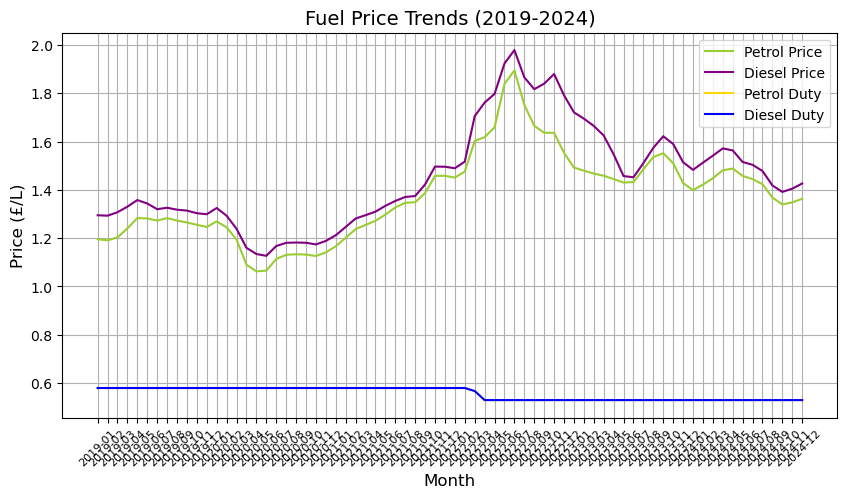

In [33]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot all fuel price trends
sns.lineplot(x="Month", y="Petrol_Price_£/L", data=df_monthly_avg, label="Petrol Price", color="yellowgreen")
sns.lineplot(x="Month", y="Diesel_Price_£/L", data=df_monthly_avg, label="Diesel Price", color="purple")
sns.lineplot(x="Month", y="Petrol_Duty_£/L", data=df_monthly_avg, label="Petrol Duty", color="gold")
sns.lineplot(x="Month", y="Diesel_Duty_£/L", data=df_monthly_avg, label="Diesel Duty", color="blue")

# Formatting
plt.xticks(rotation=45, fontsize=8)  # Reduce font size for better readability
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Price (£/L)", fontsize=12)
plt.title("Fuel Price Trends (2019-2024)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()

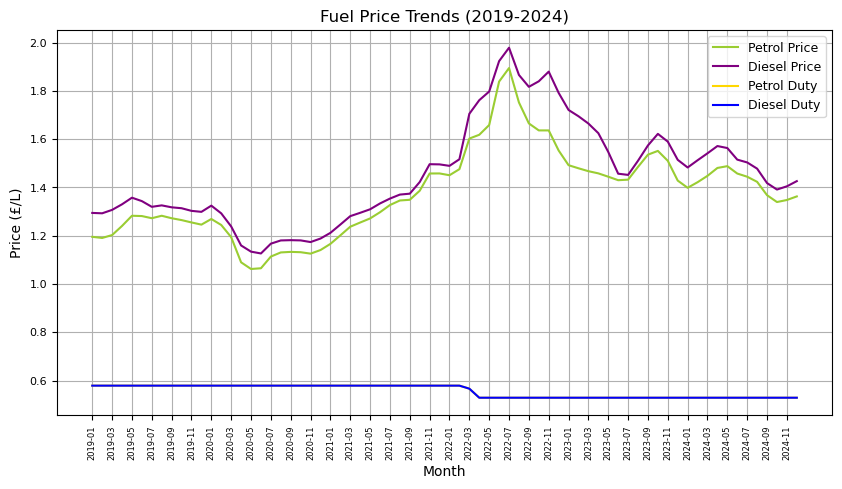

In [34]:
plt.figure(figsize=(10, 5))

sns.lineplot(x="Month", y="Petrol_Price_£/L", data=df_monthly_avg, label="Petrol Price", color="yellowgreen")
sns.lineplot(x="Month", y="Diesel_Price_£/L", data=df_monthly_avg, label="Diesel Price", color="purple")
sns.lineplot(x="Month", y="Petrol_Duty_£/L", data=df_monthly_avg, label="Petrol Duty", color="gold")
sns.lineplot(x="Month", y="Diesel_Duty_£/L", data=df_monthly_avg, label="Diesel Duty", color="blue")

plt.xticks(rotation=90, fontsize=6)  # Strict vertical alignment, smaller font
plt.yticks(fontsize=8)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Price (£/L)", fontsize=10)
plt.title("Fuel Price Trends (2019-2024)", fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)

# Show every second month on X-axis
plt.xticks(ticks=range(0, len(df_monthly_avg), 2), labels=df_monthly_avg["Month"].iloc[::2])

plt.show()

## Findings from Fuel Price Trends

### 1. Petrol and Diesel Prices Follow a Similar Trend
- Both fuel prices exhibit a **strong upward trend from 2019 to mid-2022**, followed by fluctuations.
- Diesel prices are consistently **higher** than petrol prices, maintaining a stable price gap.

### 2. Significant Price Surge in 2022
- A **sharp spike in fuel prices** is observed in **early 2022**, peaking mid-year.
- This could be linked to **global events, supply chain disruptions, or economic policies**.

### 3. Fuel Duty Rates Remain Constant with a Temporary Drop
- **Petrol and diesel duty rates** are mostly stable across the period.
- A **temporary drop** is noticeable around 2022, possibly as a government intervention to stabilize fuel prices.

### 4. Price Stabilization After 2023
- Post-2023, **fuel prices decline and stabilize**, indicating market correction.
- However, **some volatility remains**, likely due to inflation or market adjustments.

### Next Steps:
- Conduct **regression analysis** to quantify the relationship between petrol and diesel prices.
- Perform **correlation analysis** to identify dependencies between prices and tax policies.
- Use **boxplots** to detect outliers and assess price volatility.


---

#### 1.12 Scatter Plots for All Dependencies

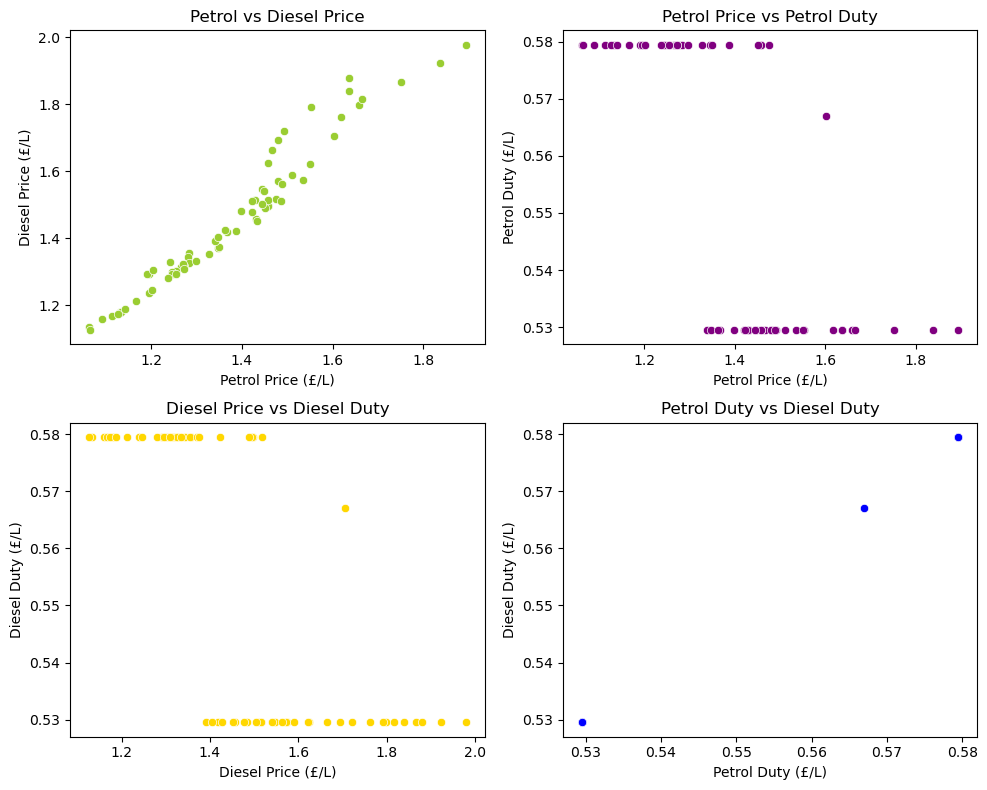

In [37]:
plt.figure(figsize=(10, 8))
# Scatter plot: Petrol vs Diesel Price
plt.subplot(2, 2, 1)
sns.scatterplot(x="Petrol_Price_£/L", y="Diesel_Price_£/L", data=df_monthly_avg, color="yellowgreen")
plt.xlabel("Petrol Price (£/L)", fontsize=10)
plt.ylabel("Diesel Price (£/L)", fontsize=10)
plt.title("Petrol vs Diesel Price", fontsize=12)

# Scatter plot: Petrol Price vs Petrol Duty
plt.subplot(2, 2, 2)
sns.scatterplot(x="Petrol_Price_£/L", y="Petrol_Duty_£/L", data=df_monthly_avg, color="purple")
plt.xlabel("Petrol Price (£/L)", fontsize=10)
plt.ylabel("Petrol Duty (£/L)", fontsize=10)
plt.title("Petrol Price vs Petrol Duty", fontsize=12)

# Scatter plot: Diesel Price vs Diesel Duty
plt.subplot(2, 2, 3)
sns.scatterplot(x="Diesel_Price_£/L", y="Diesel_Duty_£/L", data=df_monthly_avg, color="gold")
plt.xlabel("Diesel Price (£/L)", fontsize=10)
plt.ylabel("Diesel Duty (£/L)", fontsize=10)
plt.title("Diesel Price vs Diesel Duty", fontsize=12)

# Scatter plot: Petrol Duty vs Diesel Duty
plt.subplot(2, 2, 4)
sns.scatterplot(x="Petrol_Duty_£/L", y="Diesel_Duty_£/L", data=df_monthly_avg, color="blue")
plt.xlabel("Petrol Duty (£/L)", fontsize=10)
plt.ylabel("Diesel Duty (£/L)", fontsize=10)
plt.title("Petrol Duty vs Diesel Duty", fontsize=12)

plt.tight_layout()
plt.show()

## Findings from Price Dependency Scatter Plots

### 1. Strong Linear Relationship Between Petrol and Diesel Prices
- The **Petrol vs Diesel Price** scatter plot shows a **clear upward trend**, confirming a **direct correlation**.
- As **petrol prices rise, diesel prices increase proportionally**, indicating that both fuels are affected by similar market forces.

### 2. No Significant Correlation Between Fuel Prices and Duty Rates
- The **Petrol Price vs Petrol Duty** and **Diesel Price vs Diesel Duty** plots show **no clear pattern**, meaning fuel duties **do not fluctuate with fuel prices**.
- This suggests that **fuel duty is government-regulated and remains stable** regardless of market prices.

### 3. Perfect Correlation Between Petrol and Diesel Duty
- The **Petrol Duty vs Diesel Duty** plot shows a **1:1 correlation**, confirming that **tax policies apply equally to both fuel types**.
- This indicates that **fuel duty changes (if any) affect both petrol and diesel simultaneously**.

### Next Steps:
- Generate a **correlation heatmap (1.13)** to further analyze dependencies between variables.
- Perform **boxplot analysis (1.14)** to detect potential price volatility and outliers.

---

#### 1.13 Correlation Heatmap
Task:
- Create a heatmap to visualize correlations between all numerical variables.
- Identify strong and weak dependencies between prices and duties.

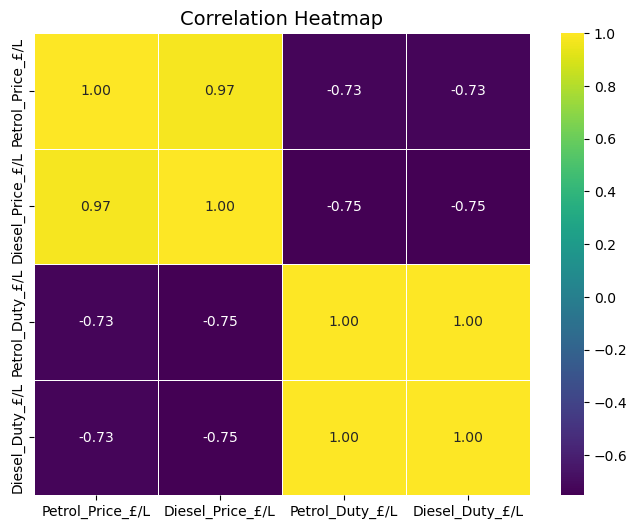

In [40]:
plt.figure(figsize=(8, 6))
# Exclude non-numeric columns
numeric_df = df_monthly_avg.select_dtypes(include=["number"])
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
# Plot heatmap with Viridis
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Findings from Correlation Heatmap

### 1. Strong Correlation Between Petrol and Diesel Prices
- The **correlation coefficient is 0.97**, indicating that **petrol and diesel prices move together**.
- This confirms that **both fuel types respond to the same market forces**.

### 2. Negative Correlation Between Fuel Prices and Duty Rates
- **Petrol and diesel prices have a negative correlation (-0.73 to -0.75) with their respective duty rates**.
- This suggests that **higher fuel prices are associated with lower tax rates**, possibly due to **government interventions to stabilize costs**.

### 3. Perfect Correlation Between Petrol and Diesel Duty
- **The correlation between Petrol Duty and Diesel Duty is exactly 1.00**, meaning **both tax rates always change together**.
- This indicates that **government tax policies are synchronized for both fuel types**.

### Next Steps:
- Perform **boxplot analysis (1.14)** to detect price volatility and identify outliers.

---

1.14 Boxplot Analysis
Task:
- Create boxplots to visualize the distribution of petrol and diesel prices.
- Identify outliers, volatility, and price stability.

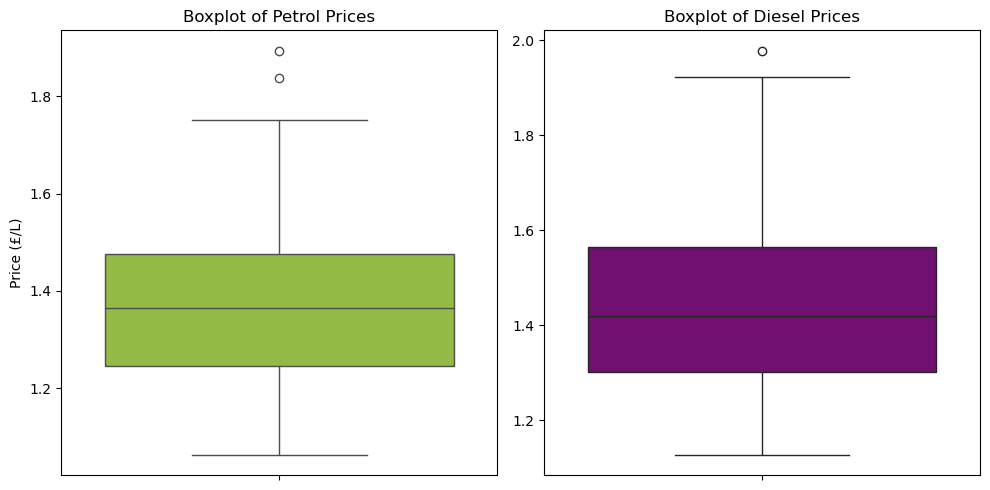

In [43]:
plt.figure(figsize=(10, 5))

# Boxplot for Petrol Prices
plt.subplot(1, 2, 1)
sns.boxplot(y=df_monthly_avg["Petrol_Price_£/L"], color="yellowgreen")
plt.title("Boxplot of Petrol Prices", fontsize=12)
plt.ylabel("Price (£/L)", fontsize=10)

# Boxplot for Diesel Prices
plt.subplot(1, 2, 2)
sns.boxplot(y=df_monthly_avg["Diesel_Price_£/L"], color="purple")
plt.title("Boxplot of Diesel Prices", fontsize=12)
plt.ylabel("")

plt.tight_layout()
plt.show()

## Findings from Boxplot Analysis

### 1. Fuel Prices Show Moderate Volatility
- Both petrol and diesel prices **fluctuate within a defined range**, with some **visible outliers**.
- This indicates that **fuel prices experienced occasional price spikes or drops over time**.

### 2. Diesel Prices Have a Slightly Larger Spread
- The **boxplot for diesel prices has a wider interquartile range (IQR)** than petrol.
- This suggests that **diesel prices were more volatile than petrol over the period analyzed**.

### 3. A Few High-Value Outliers
- There are **a few outliers in both boxplots**, indicating that **some months had significantly higher prices** than usual.
- These outliers could be linked to **external market events, inflation, or supply chain disruptions**.

### Next Steps:
- Create **boxplots for fuel duty rates** to analyze their stability.

---

1.15 Boxplot Analysis: Fuel Duty Rates
Task:
- Create boxplots to analyze the distribution of petrol and diesel duty rates.
- Identify volatility, outliers, and stability of tax rates.

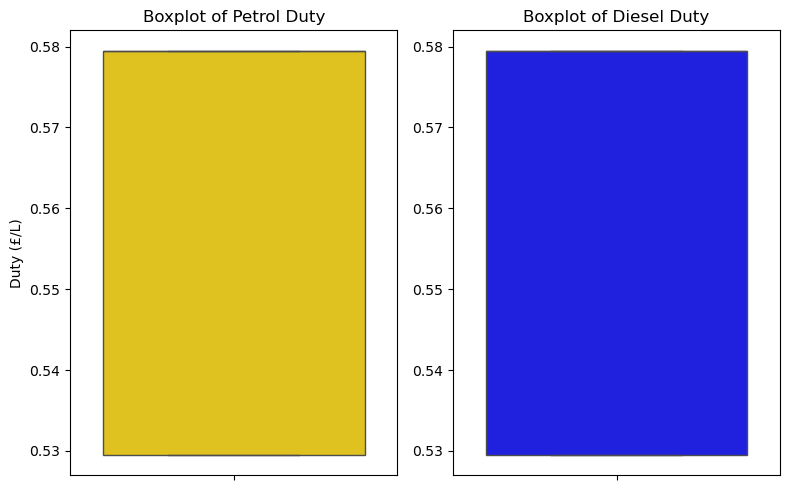

In [49]:
plt.figure(figsize=(8, 5))

# Boxplot for Petrol Duty
plt.subplot(1, 2, 1)
sns.boxplot(y=df_monthly_avg["Petrol_Duty_£/L"], color="gold")
plt.title("Boxplot of Petrol Duty", fontsize=12)
plt.ylabel("Duty (£/L)", fontsize=10)

# Boxplot for Diesel Duty
plt.subplot(1, 2, 2)
sns.boxplot(y=df_monthly_avg["Diesel_Duty_£/L"], color="blue")
plt.title("Boxplot of Diesel Duty", fontsize=12)
plt.ylabel("")

plt.tight_layout()
plt.show()

In [50]:
# Check descriptive statistics for the relevant columns
print(df_monthly_avg["Petrol_Duty_£/L"].describe())
print(df_monthly_avg["Diesel_Duty_£/L"].describe())

count    72.00000
mean      0.55641
std       0.02497
min       0.52950
25%       0.52950
50%       0.57950
75%       0.57950
max       0.57950
Name: Petrol_Duty_£/L, dtype: float64
count    72.00000
mean      0.55641
std       0.02497
min       0.52950
25%       0.52950
50%       0.57950
75%       0.57950
max       0.57950
Name: Diesel_Duty_£/L, dtype: float64


### Findings:

- The data for both **Petrol Duty** and **Diesel Duty** exhibit very similar characteristics.
- The **mean** for both petrol and diesel duty rates is **0.55641**, and both have a **standard deviation** of **0.02497**, indicating very little variability.
- The range of values for both petrol and diesel duty rates is quite narrow, with values clustered between **0.52950** and **0.57950**.
- The **25th, 50th (median), and 75th percentiles** for both datasets are identical: **0.52950**, **0.57950**, and **0.57950**, respectively.
- Both data distributions appear to have no significant spread, outliers, or volatility, which is reflected in the flat appearance of the boxplots.

---

# Fuel Data Processing

## Data Source:
UK Weekly Fuel Prices Dataset

### Tasks:
- Filtered data from 2019 onwards
- Converted prices to monthly averages
- Performed basic EDA (correlation analysis, regression analysis, boxplots)
- Saved cleaned data to CSV

## Process:

### 1. Imported Libraries:
We imported the necessary libraries for data processing: `pandas`, `numpy`, `matplotlib`, `seaborn`, and `datetime`.

### 2. Imported and Filtered Data:
The UK Weekly Fuel Prices dataset was imported using pandas. The data was filtered to include only records from January 1, 2019, onwards and saved as `fuel_prices_2019_onwards.csv`.

### 3. Data Preparation:
Prices were converted from pence per litre to pounds per litre by dividing the price columns by 100. VAT percentage rate columns were removed. The cleaned dataset was saved as `fuel_prices_cleaned.csv`.

### 4. Date Filtering:
Data after January 1, 2025, was removed, and the dataset was saved as `fuel_prices_final.csv`.

### 5. Aggregation to Monthly Averages:
The data was aggregated to monthly averages using the `groupby()` function, creating a new column for the year-month format. This aggregated dataset was saved as `fuel_prices_monthly_avg.csv`.

### 6. Renamed Columns:
Columns were renamed to more user-friendly names like `Petrol_Price_£/L` and `Diesel_Price_£/L`. The final dataset was saved as `fuel_prices_final_cleaned.csv`.

### 7. Data Quality Checks:
We checked the dataset for missing values, duplicates, and zero values. The dataset passed all checks, with no missing or zero values.

### 8. EDA (Exploratory Data Analysis):
- **Correlation Analysis**: A heatmap was created to visualize correlations between petrol and diesel prices, and their respective duty rates.
- **Regression Analysis**: We conducted regression analysis to understand the relationships between fuel prices and duties.
- **Boxplots**: Boxplots were created for both petrol and diesel prices to analyze volatility and outliers. 
- **Trend Analysis**: Line plots were generated to visualize the trends of fuel prices and duty rates over time, revealing patterns like a sharp price surge in 2022 and stabilization in 2023.

### 9. Final Dataset:
The final cleaned dataset was saved as `fuel_prices_final_cleaned.csv` and is ready for further analysis.